In [1]:
#IMPORTING USEFUL LIBRARIES

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data file
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df.info() # No null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.columns # DETAILS OF THE FEATURE

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.shape # 5000 rows and 14 columns

(5000, 14)

# Hypothesis Generation
This is a very important stage in any data science analysis. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.
Below are some of the factors which I think can affect the likelihood of a liability customer buying personal loans (dependent variable for this loan prediction problem):
Salary: Salary can be one of the major dependent variables as customers with high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
The number of family members: More the number of earning family members, less probability of buying personal loans.
Age: Customers with probably the age of 30–50 will have more probability to buy personal loans.
Education of the customer: The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

In [7]:
#TARGET COLUMN DISTRIBUTION IN THE DATA
df['Personal Loan'].value_counts(normalize=True)  

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# Information on the features or attributes




The attributes can be divided accordingly :

The variable ID is just an indexing number There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by Bank?

Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

Family - Family size of the customer,
Education - education level of the customer

The nominal variable is :

ID,
Zip Code


In [8]:
# Eye balling the data
df.describe().transpose() 

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

# Observation:
Column 'Experience' has negative values, so we have to clean that column

# REPLACING NEGATIVE VALUES WITH THE MEDIAN VALUES OF THE COLUMN

In [9]:
any(df['Experience'] < 0)

True

In [10]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [11]:
any(df['Experience'] < 0)

False

In [12]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.327600    11.253035     0.0     11.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [13]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [14]:
import pandas_profiling 

In [15]:
df.profile_report()#Detailed Exploratory Data Analysis 

# Points observed by profile report




The data set got 0 missing cells.
It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
It got 2 categorical variables: ‘Education’, ‘Family’
It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
Also, Experience is highly correlated with Age.

Categorical

42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
Around 29% of the customer’s family size is 1.

Boolean

94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
Around 60% of customers use internet banking facilities.
Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
Around 90% of the customer doesn’t have a securities account with the bank.


Numeric

The mean age of the customers is 45 with standard deviation of 11.5. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)
Also, no need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series.


# UNIVARIATE ANALYSIS

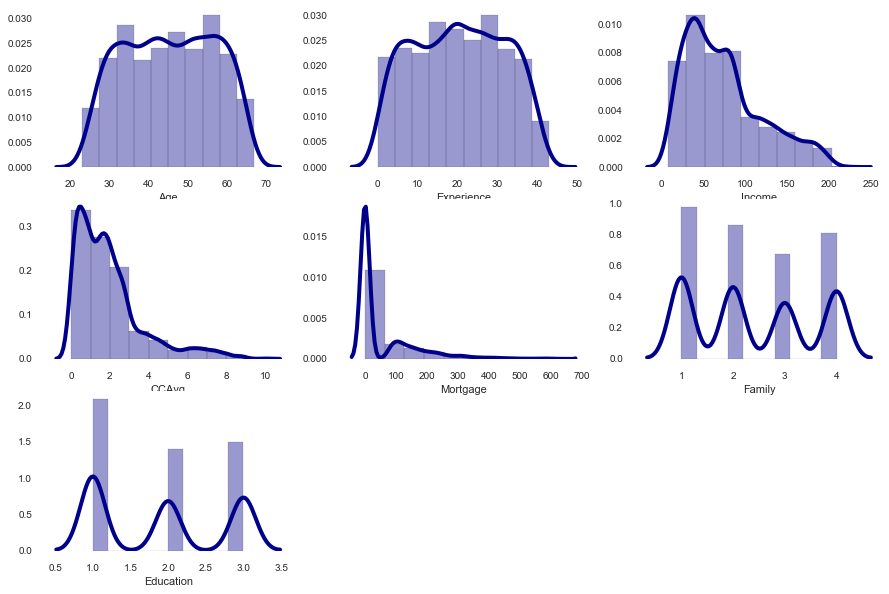

In [16]:
plt.figure(figsize= (15,10))

plt.subplot(3,3,1)
sns.distplot(df['Age'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(3,3,2)
sns.distplot(df['Experience'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})

plt.subplot(3,3,3)
sns.distplot(df['Income'], hist=True, kde=True,  
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot(3,3,4)
sns.distplot(df['CCAvg'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(3,3,5)
sns.distplot(df['Mortgage'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(3,3,6)
sns.distplot(df['Family'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(3,3,7)
sns.distplot(df['Education'], hist=True, kde=True, 
             bins=int(50/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

 

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
Income is positively skewed. Majority of the customers have income between 45K and 55K.
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
Mortgage 70% of the individuals have a mortgage of less than 40K.
The variables family and education are ordinal variables. The distribution of families is evenly distributes

# Univariate Analysis of the continuous variables - 2

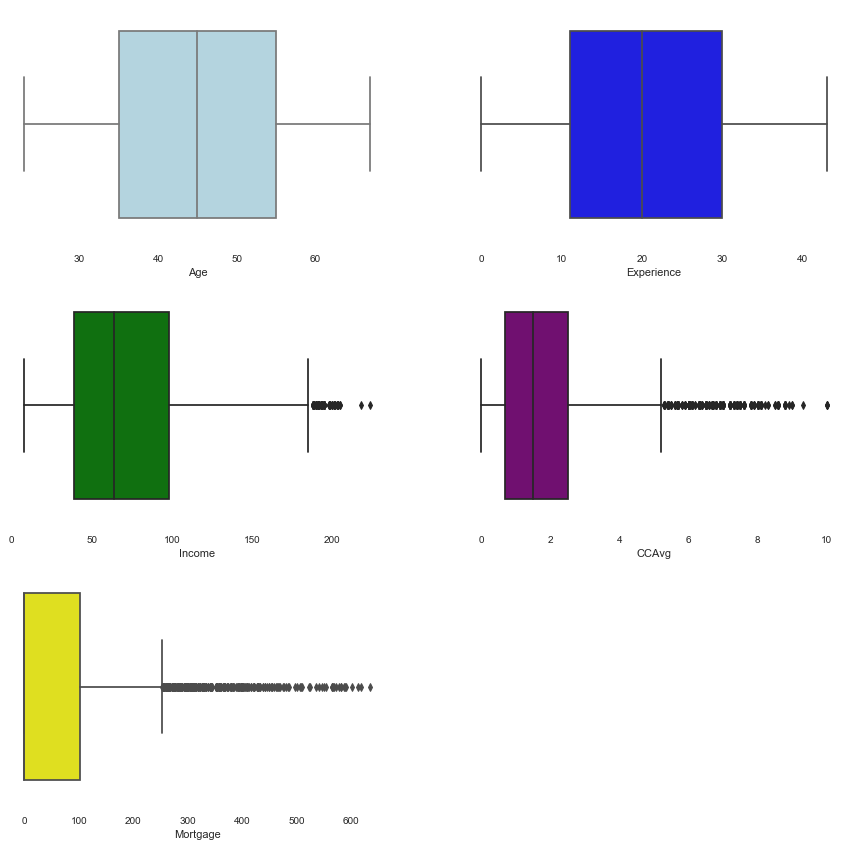

In [17]:
plt.figure(figsize= (15,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)  
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow')


Inference
Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.
Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.
Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

# Univariate Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

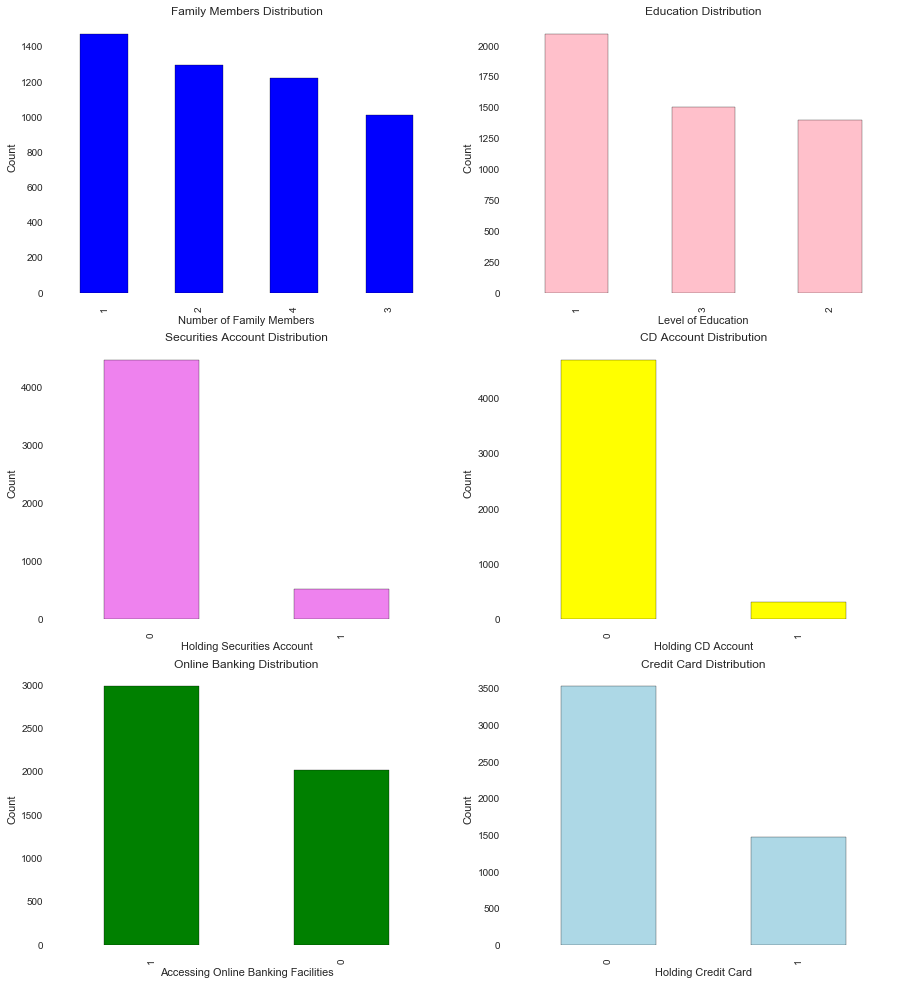

In [18]:
plt.figure(figsize=(15,35))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")


Observations
The variables family and education are ordinal variables. The distribution of families is evenly distributed
It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible

# MULTIVARIATE ANALYSIS

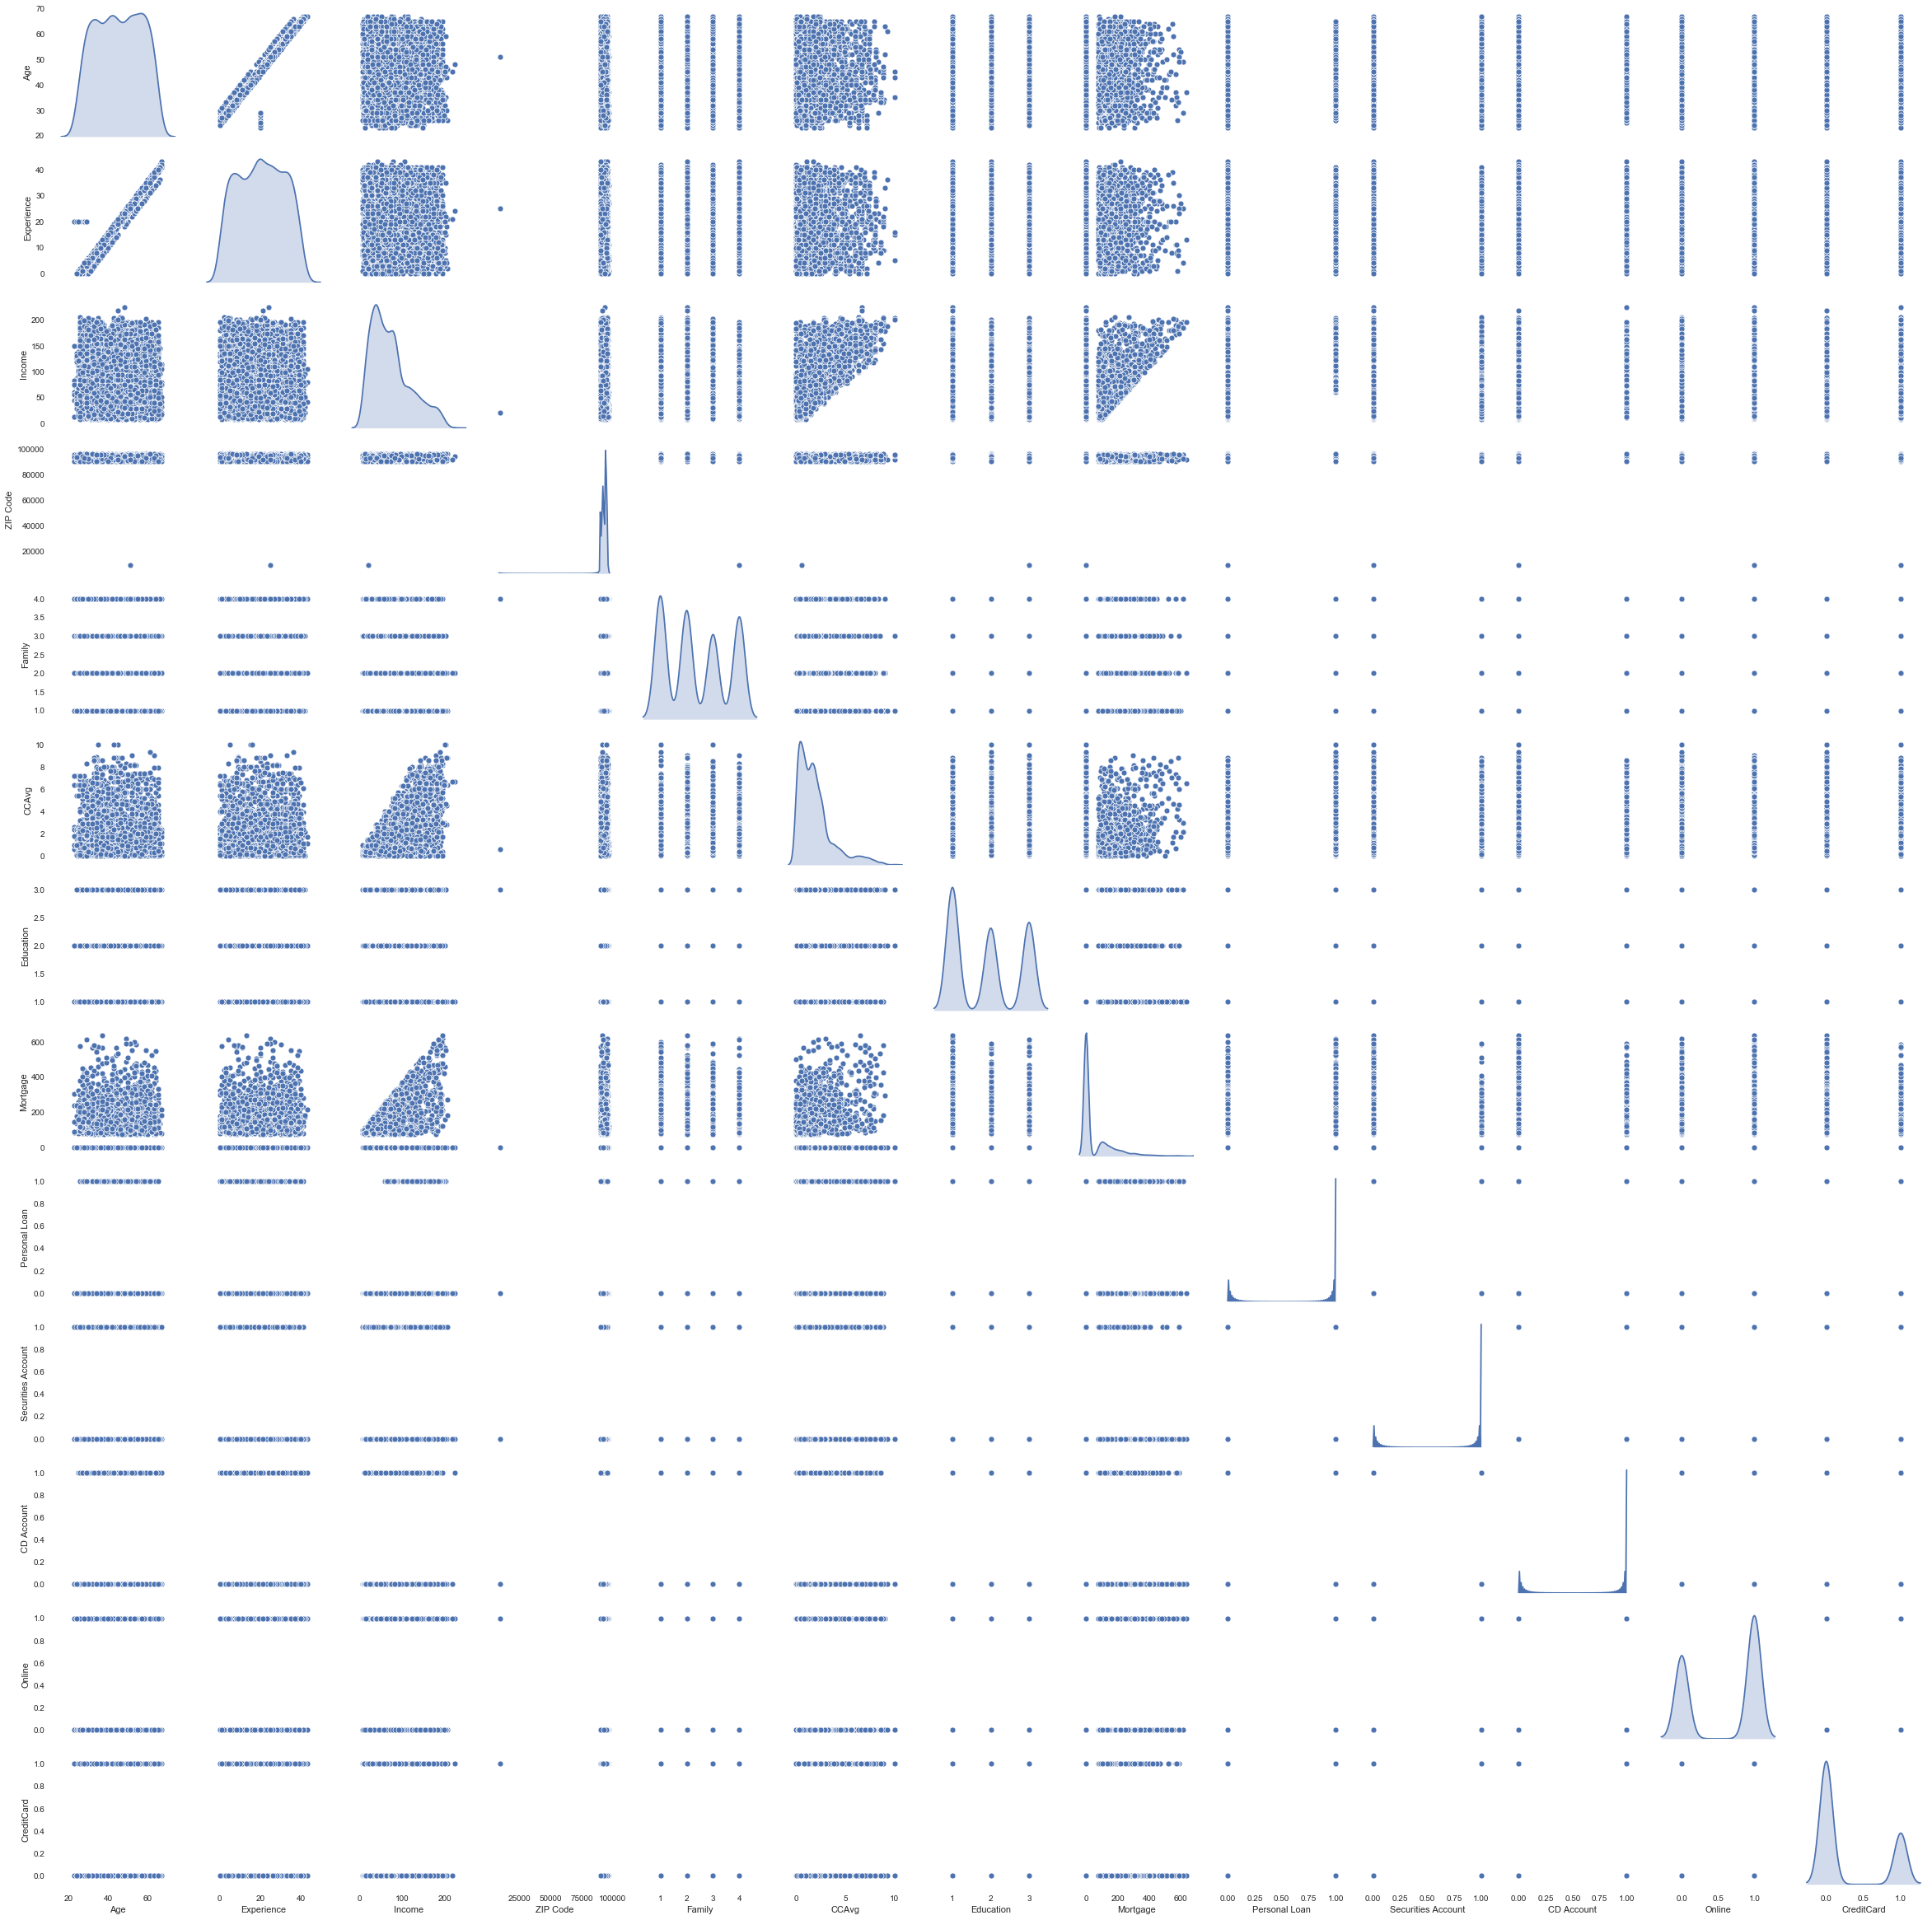

In [19]:
sns.pairplot(df.iloc[:,1:],diag_kind = "kde")

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
The variables family and education are ordinal variables. The distribution of families is evenly distributes
In :


# CHECKING MISSING VALUES

In [20]:
df.isnull().sum() 


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# OUTLIERS

As we could see in Mortgage, there were presence of outliers
Having outliers often has a significant effect on the mean and standard deviation and, hence affecting the distribution. We must take steps to remove outliers from our data sets.
Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the z-score.

# Dependant variable analysis

In [21]:
df["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

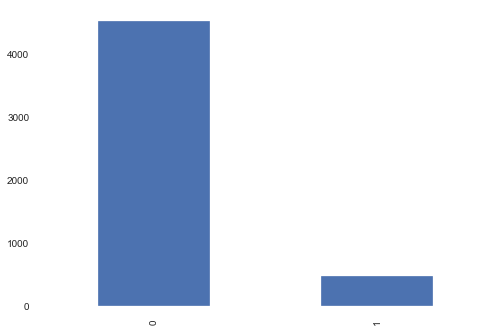

In [22]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

# Influence of few attributes on 'Personal Loan' - Dependant Variable

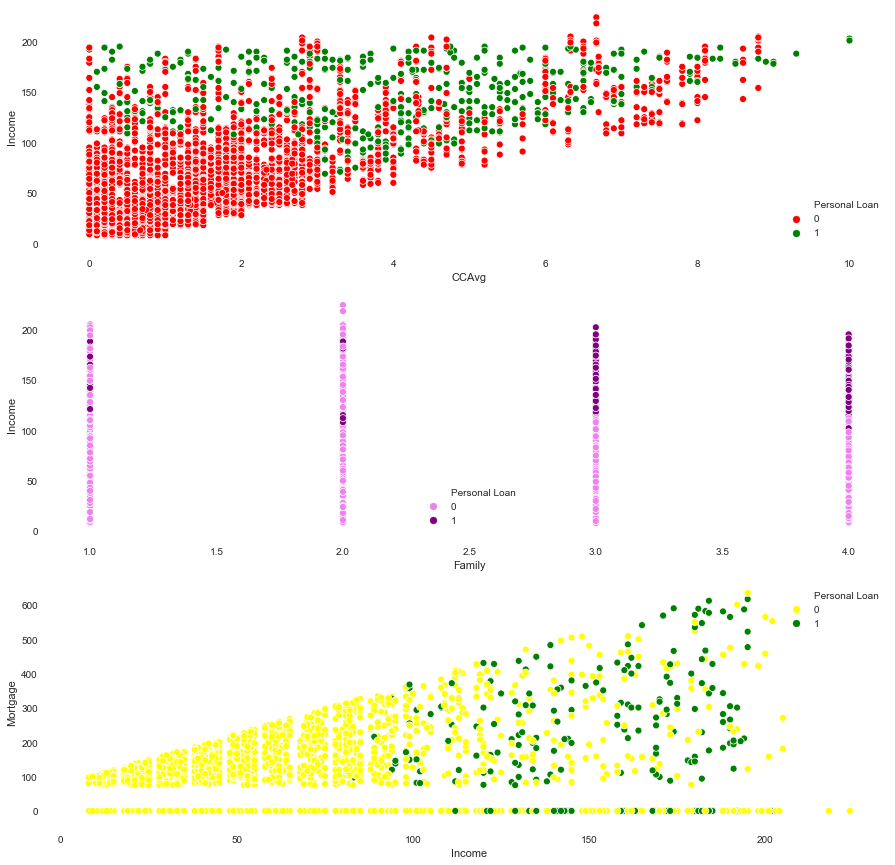

In [23]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green'])

Observation
The graph show persons who have personal loan have a higher credit card average.
It is clearly visible that as the members of family increases (say >=3) the necessity of loan is also increasing.
It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually with the necessity of personal loan.

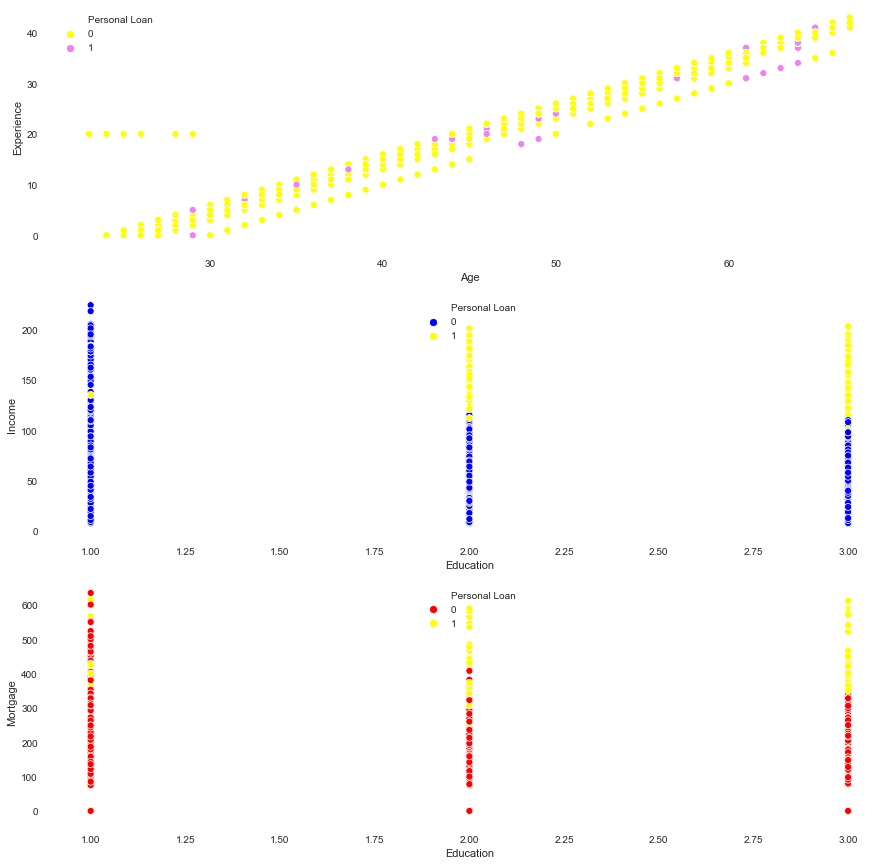

In [24]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

Observation
'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

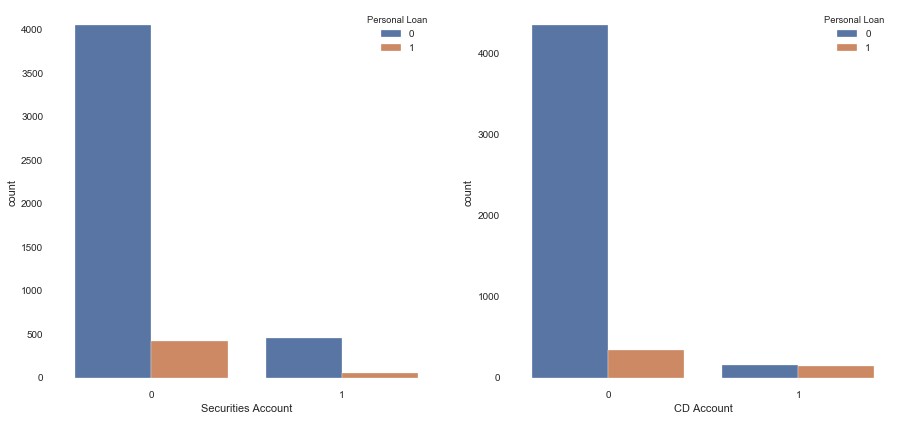

In [25]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

Observation
Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.

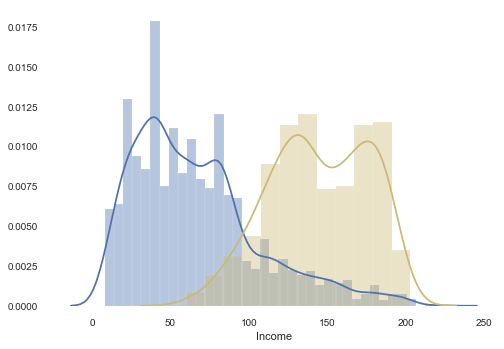

In [26]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y')

Observation
The graph show those who have personal loan also have a higher income.


Text(0, 0.5, 'Age')

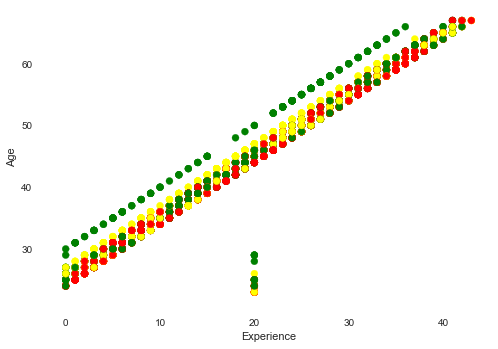

In [27]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

# Observation
The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

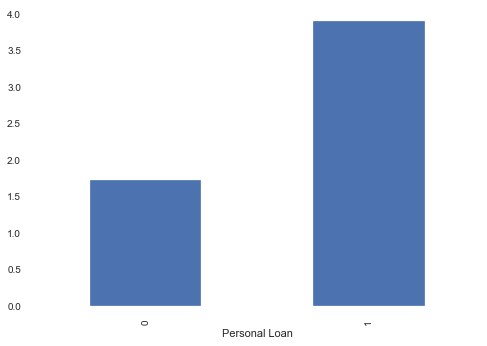

In [28]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

Here the y-axis represents the mean spending on credit cards per month. It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.


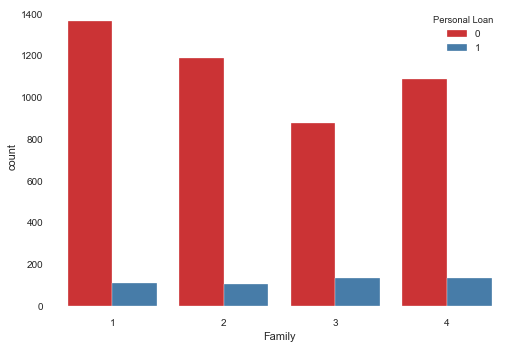

In [29]:
 sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

In [30]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

Personal Loan       Age    Income     CCAvg  Mortgage
Personal Loan       1.000000 -0.007726  0.502462  0.366889  0.142095
Age                -0.007726  1.000000 -0.055269 -0.052012 -0.012539
Income              0.502462 -0.055269  1.000000  0.645984  0.206806
CCAvg               0.366889 -0.052012  0.645984  1.000000  0.109905
Mortgage            0.142095 -0.012539  0.206806  0.109905  1.000000

In [31]:
feature = df.drop(["ID","Personal Loan"],axis=1)
target = df["Personal Loan"]

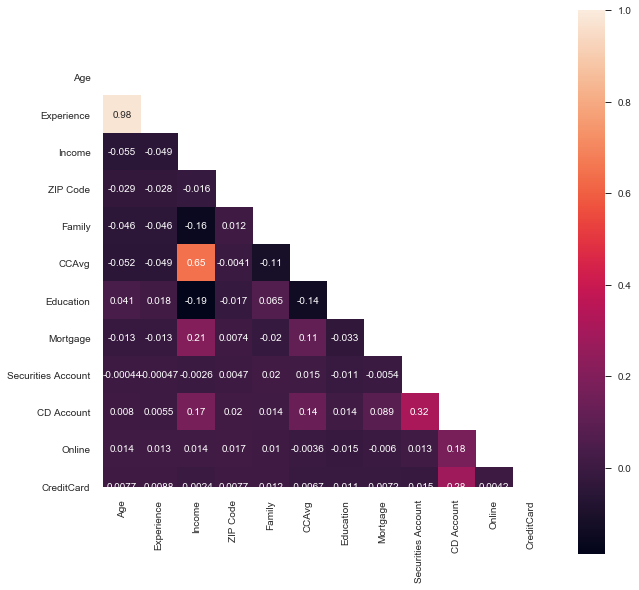

In [32]:

corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

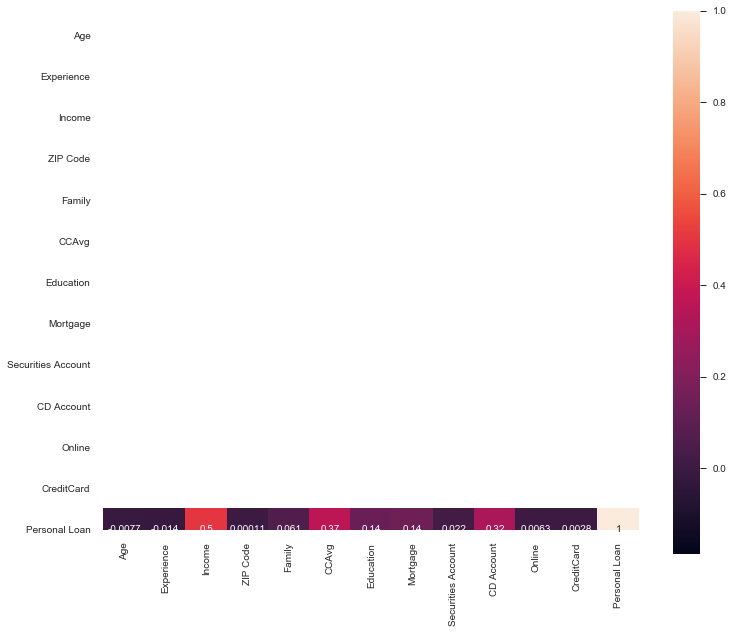

In [33]:
df_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(12, 10))
with sns.axes_style("white"):
    sns.heatmap(df_corr, annot=True,square=True,mask=mask)

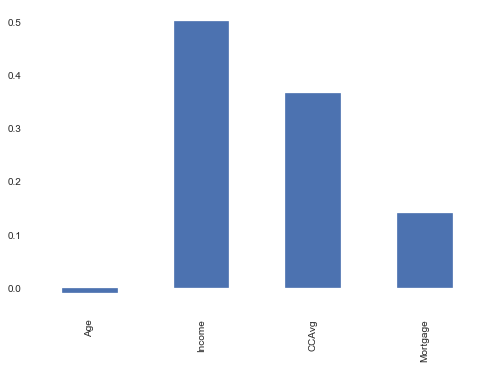

In [34]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

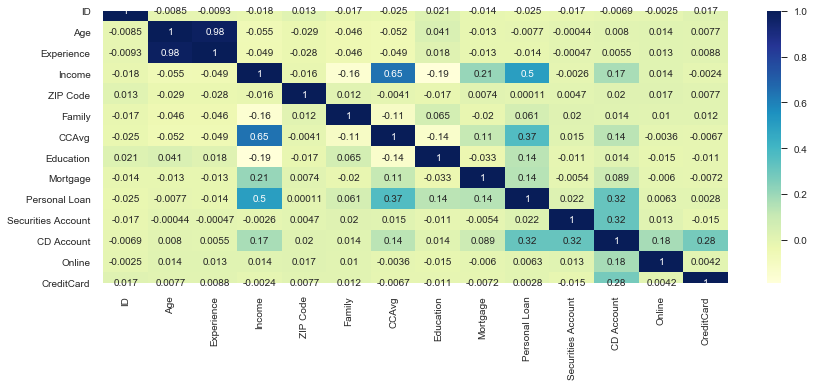

In [35]:
plt.figure(figsize=(14,5))

corr=df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

Observations. From the above correlation heatmap we see that experience and age are strongly correlated. Also, average credit card spending is moderately correlated with income and slightly correlated with personal loan.

# HANDLING OUTLIERS OF MORTGAGE


In [36]:
from scipy import stats  

Text(0.5, 1.0, 'Mortgage Distribution with KDE')

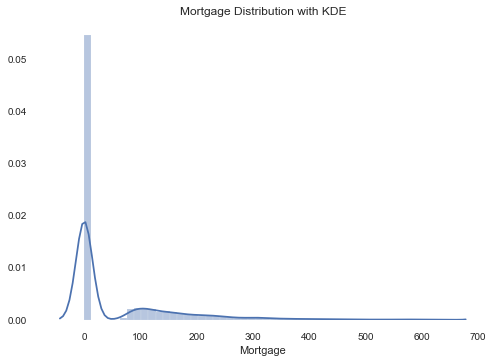

In [37]:
sns.distplot(feature["Mortgage"])
plt.title("Mortgage Distribution with KDE")

Having outliers often has a significant effect on the mean and standard deviation and, hence affecting the distribution. We must take steps to remove outliers from our data sets.
Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the z-score.

In [38]:
df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)# DROPPING THE OUTLIERS 

Here I had chosen those rows only whose z_score is less than 3, it can vary accordingly. Here we had dropped more than 100+ rows which contain outliers and now we can start with the model building.

In [39]:
df.shape


(4895, 14)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve,auc

# NORMALISING THE DATA

In [41]:
from sklearn import preprocessing 

In [42]:
X=df.drop(['Personal Loan','ID','Experience','ZIP Code'],axis=1)# DROPPING EXPERIENCE COLUMN ALSO AS ‘Experience’ is highly correlated with ‘Age’.

y=df['Personal Loan']  

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

# LOGISTIC REGRESSION

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

In [46]:
model.fit(X_train1,y_train) ## This is called model training or model learning.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = model.predict(X_test1)## Prediction done on the trainig set.

In [48]:
print(accuracy_score(y_test,y_pred))# Use score method to get accuracy of model
parameters = model.coef_# printing the coefficents of different parameters
print(parameters)
intercept=model.intercept_
print(intercept)

0.9503063308373043
[[ 0.07711585  2.32333066  0.78605163  0.27305193  1.41729242  0.07485988
  -0.23045046  0.88130188 -0.35059559 -0.54398004]]
[-4.74488629]


In [49]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1331
           1       0.84      0.58      0.69       138

    accuracy                           0.95      1469
   macro avg       0.90      0.78      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [50]:
print(confusion_matrix(y_test,y_pred))

[[1316   15]
 [  58   80]]


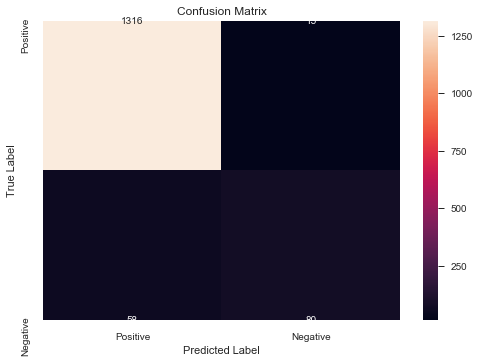

In [51]:
# Confusion Matrix -Report based on the training set.
cm = confusion_matrix(y_test, y_pred)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label) 
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.show()

In [52]:
ylog_proba=model.predict_proba(X_test1)
fpr,tpr,threshold=roc_curve(y_test,ylog_proba[:,1])### Lets get the probabilit score for the class 1( we can get for 0 as well)  
roc_auc=auc(fpr,tpr)
print("Area under the Roc Curve : %f" % roc_auc)


Area under the Roc Curve : 0.948529


AUC is useful as a single number summary of classifier performance
Higher value = better classifier
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability ] to the positive observation
AUC is useful even when there is high class imbalance (unlike classification accuracy)

In [53]:
# CALCULATING FPR,TPR AND THRESHOLD
i = np.arange(len(tpr)) # index for df
roc_df = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i),  'threshold' : pd.Series(threshold, index = i)})

In [54]:
roc_df

fpr       tpr  threshold
0    0.000000  0.000000   1.999417
1    0.000000  0.007246   0.999417
2    0.000000  0.427536   0.784454
3    0.000751  0.427536   0.783764
4    0.000751  0.449275   0.757715
..        ...       ...        ...
119  0.696469  0.992754   0.001473
120  0.696469  1.000000   0.001467
121  0.739294  1.000000   0.001082
122  0.740796  1.000000   0.001073
123  1.000000  1.000000   0.000008

[124 rows x 3 columns]

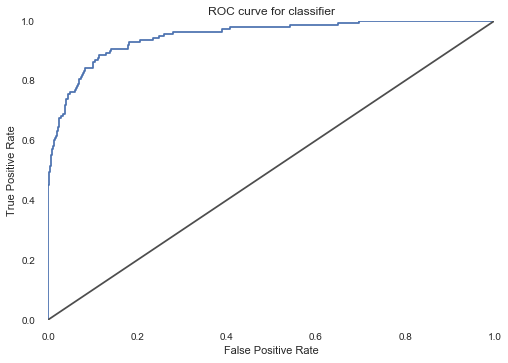

In [55]:
#PLOTTING ROC CURVE
fpr,tpr,threshold=roc_curve(y_test,ylog_proba[:,1])

fig, ax = plt.subplots()  
ax.plot(fpr, tpr) 
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for classifier', fontweight = 30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The slanting line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Grid-search -logistic regression
It is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,21,7), "penalty":["l1","l2"],"max_iter":[100,500,600,1000,2500,5000],"solver" : ["liblinear"]}# l1 lasso l2 ridge
logreg=LogisticRegression()  
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=True,n_jobs=-1,scoring='accuracy')
logreg_cv.fit(X_train1,y_train)
     
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_) 
print("accuracy :",logreg_cv.best_score_) 

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s


tuned hpyerparameters :(best parameters)  {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9562171628721541


[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:    6.8s finished


In [57]:
logreg2=LogisticRegression(C=10,penalty="l1",solver="liblinear")  
logreg2.fit(X_train1,y_train)
y_pred1 = logreg2.predict(X_test1)
print(" Training score",logreg2.score(X_train1,y_train)) # TRAINING SCORE AFTER GRIDSEARCH CV 
print("Testing score",logreg2.score(X_test1,y_test))     # TESTING SCORE AFTER GRIDSEARCH CV 
   

 Training score 0.9573847051955633
Testing score 0.9503063308373043


In [58]:
print(accuracy_score(y_test,y_pred1)) 

0.9503063308373043


In [59]:
cm_log=confusion_matrix(y_test,y_pred1) 
print(cm_log)

[[1316   15]
 [  58   80]]


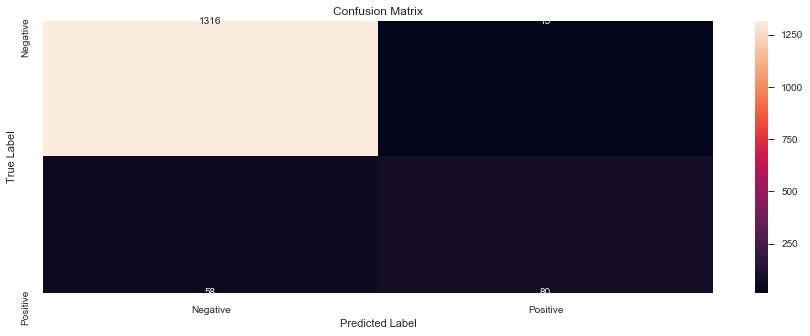

In [60]:
cm_log = confusion_matrix(y_test, y_pred1)

class_label = ["Negative", "Positive"]
df_cm = pd.DataFrame(cm_log, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")   
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1331
           1       0.84      0.58      0.69       138

    accuracy                           0.95      1469
   macro avg       0.90      0.78      0.83      1469
weighted avg       0.95      0.95      0.95      1469



# OBSERVATION FOR LOGISTIC REGRESSION AND KEY HYPERPARAMETERS USED

Gidsearch CV doesn`t have any effect on Logistic Regression as the Model itself is tuned properly.
Also, the area under the curve is around 94.8% and accuracy is 95%

### List of Hyperparameters used:

Penalty: This hyper-parameter is used to specify the type of normalization used.  Few of the values for this hyper-parameter can be l1(lasso), l2(ridge) or none. The default value is l2.
Inverse of regularization: This hyper-parameter is denoted as C. Smaller values of this hyper-parameter indicates a stronger regularization. Default value is 1.0
Random state : random_state is the seed used by the random number generator. Default value is None.
Solver: This indicates which algorithm to use in the optimization problem. Default value is lbfgs. other possible values are newton-cg, liblinear, sag, saga.
Max iter : max_iter represents maximum number of iterations taken for the solvers to converge a training process.

# Metrics computed from a confusion matrix- Logistic Regression

In [62]:
import sklearn.metrics as metrics
# save confusion matrix and slice into four pieces  
confusion = metrics.confusion_matrix(y_test, y_pred1)
print(confusion) 
#[row, column]
TP = confusion[1, 1]# we correctly predicted that they will take loan
TN = confusion[0, 0]# we correctly predicted that they will  not take loan
FP = confusion[0, 1]# we incorrectly predicted that they will take loan (a "Type I error") 
FN = confusion[1, 0]# we incorrectly predicted that they will not take loan (a "Type II error")

[[1316   15]
 [  58   80]]


Classification Accuracy: Overall, how often is the classifier correct?

In [63]:
# use float to perform true division, not integer division  
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred1))

0.9503063308373043
0.9503063308373043


Classification Error: Overall, how often is the classifier incorrect?
Also known as "Misclassification Rate"

In [64]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)  
print(1 - metrics.accuracy_score(y_test, y_pred1))

0.049693669162695714
0.049693669162695686


Sensitivity: When the actual value is positive, how often is the prediction correct?
Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"
TP / all positive
all positive = TP + FN

In [65]:
sensitivity = TP / float(FN + TP)
 
print(metrics.recall_score(y_test, y_pred1))

0.5797101449275363


Specificity: When the actual value is negative, how often is the prediction correct?
Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [66]:
specificity = TN / (TN + FP)

print(specificity)

0.9887302779864763


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [67]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.011269722013523666
0.01126972201352372


Precision: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [68]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred1))

0.8421052631578947
0.8421052631578947


### Range estimate at 95% confidence for the model performance in production-LOGISTIC REGRESSION

In [69]:

##LOGISTIC REGRESSION MODEL have a classification error (calculated above) 0.04969366916 (error = 0.049), on a validation dataset with 1469 test examples (n = 1469). We can calculate the 95% confidence interval (z = 1.96) as follows:
# binomial confidence interval 
from math import sqrt
interval = 1.96 * sqrt( (0.049 * (1 - 0.049)) / 1469)# n=1469(no of observations)
print('%.3f' % interval)

0.011


We can then make claims such as:

The classification error of the model is 4.9% +/-1.1% with 95% confidence level
The true classification error of the model is likely between 3.8% and 6%.

# Conclusion:
Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection 
Which metrics should you focus on? 
Choice of metric depends on your business objective  
Identify if FP or FN is more important to reduce
Choose metric with relevant variable (FP or FN in the equation)


# KNN CLASSIFIER-


KNN is a very popular algorithm. Its popularity springs from the fact that it is very easy to understand and interpret yet many times its accuracy is comparable or even better than other, more complicated algorithms.
KNN is a supervised algorithm, it is non-parametric and lazy (  instance-based).
Why is it lazy? Because it does not explicitly learn the model, but it saves all the training data and uses the whole training set for classification or prediction.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


In [71]:
knn= KNeighborsClassifier(n_neighbors= 1)# taking n_neighbours randomly as 1

knn.fit(X_train1, y_train)     
y_predicted = knn.predict(X_test1) 
from sklearn.metrics import accuracy_score
print('Train score: {}'.format(knn.score(X_train1, y_train) * 100))#Accuracy on Training score
print('Test score: {}'.format(knn.score(X_test1, y_test) * 100))    #Accuracy on Testing score

Train score: 100.0
Test score: 95.98366235534377


In [72]:
accuracy_score(y_test,y_predicted) # Calculating the Accuracy score (Resulting in an overfit data)

0.9598366235534377

In [73]:
cm=confusion_matrix(y_test, y_predicted)  #Printing confusion Matrix
print(cm)  

[[1317   14]
 [  45   93]]


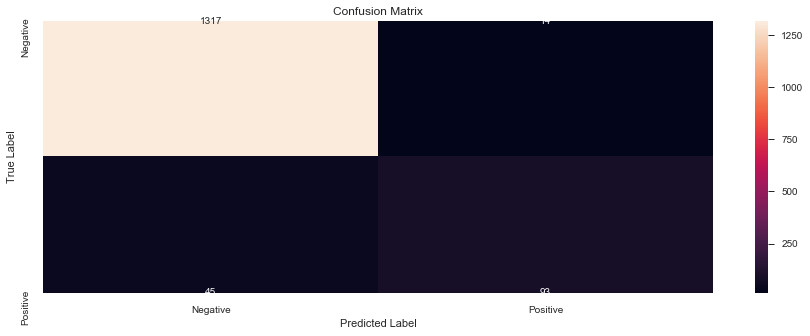

In [74]:
 # Confusion Matrix
cm1 = confusion_matrix(y_test, y_predicted)
   
class_label = ["Negative","Positive"]  
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label") 
plt.ylabel("True Label")
plt.show()

In [75]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predicted))# printing the Classification Report
print('Total accuracy:', np.round(metrics.accuracy_score(y_test,y_predicted),2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1331
           1       0.87      0.67      0.76       138

    accuracy                           0.96      1469
   macro avg       0.92      0.83      0.87      1469
weighted avg       0.96      0.96      0.96      1469

Total accuracy: 0.96


In [76]:
#Calculating Area Under the Curve
knn_prob=knn.predict_proba(X_test1)
fpr2,tpr2,threshold2=roc_curve(y_test,knn_prob[:,1])

roc_auc2=auc(fpr2,tpr2)
print("Area under the Roc Curve of KNN ALGORITHM : %f" % roc_auc2)

Area under the Roc Curve of KNN ALGORITHM : 0.831697


In [77]:
auc_score = metrics.roc_auc_score(y_test,knn_prob[:,1])
round( float( auc_score ), 2 ) 

0.83

In [78]:
# Calculating FPR,TPR,THRESHOLD FOR KNN CLASSIFICATION
i = np.arange(len(tpr2)) # index for df 
roc_df = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i),  'threshold2' : pd.Series(threshold2, index = i)})

In [79]:
roc_df

fpr2      tpr2  threshold2
0  0.000000  0.000000         2.0
1  0.010518  0.673913         1.0
2  1.000000  1.000000         0.0

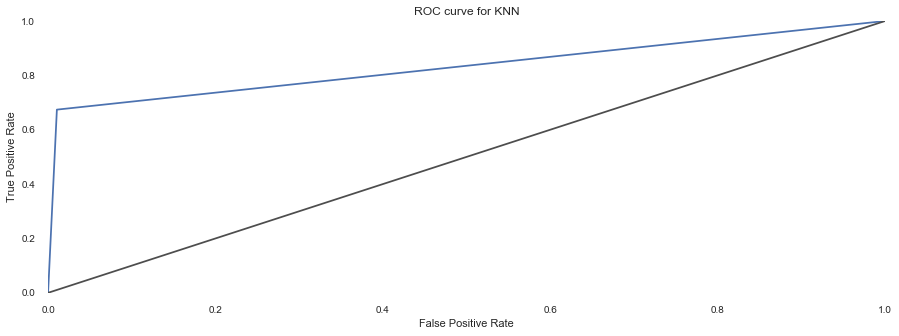

In [80]:
# PRINTING ROC CURVE
 
fpr2,tpr2,threshold2=roc_curve(y_test,knn_prob[:,1])

fig, ax = plt.subplots()
ax.plot(fpr2, tpr2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])       
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for KNN', fontweight = 30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()   

In [81]:
#USING GRIDSEARCH CV TO TUNE THE PARAMETERS
grid_params={'n_neighbors':[1,3,5,7,11],'metric':["euclidean",'cityblock'],'weights':["uniform","distance"]}
knn_classifier=KNeighborsClassifier(algorithm='brute')

In [82]:
gs=GridSearchCV(knn_classifier,grid_params,verbose=1,cv=10,n_jobs=-1)

In [83]:
gs.fit(X_train1,y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s


0.964681844716871
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


# USING THE BEST PARAMETER,ESTIMATOR CALCULATED FROM GRIDSEARCH TO CALCULATE BEST ACCURACY SCORE

In [84]:
knn1 = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', metric = 'euclidean')

knn1.fit(X_train1, y_train)    
y_predicted1 = knn1.predict(X_test1) 
from sklearn.metrics import accuracy_score 
print('Accuracy on Train score: {}'.format(knn1.score(X_train1, y_train) * 100))
print('Accuracy on Test score: {}'.format(knn1.score(X_test1, y_test) * 100))

Accuracy on Train score: 97.8984238178634
Accuracy on Test score: 95.30292716133424


In [85]:
accuracy_score(y_test,y_predicted1) # Accuracy score After Gridsearch

0.9530292716133424

In [86]:
cm_knn=confusion_matrix(y_test, y_predicted1)# Confusion Matrix After Gridsearch
print(cm_knn)   

[[1322    9]
 [  60   78]]


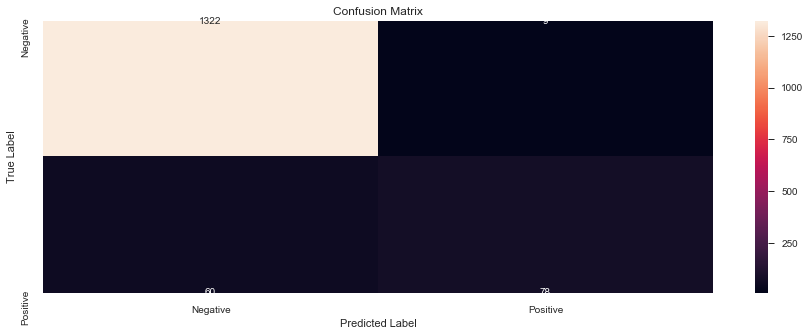

In [87]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_predicted1)

class_label = ["Negative", "Positive"] 
df_cm_knn = pd.DataFrame(cm_knn, index = class_label, columns = class_label)
sns.heatmap(df_cm_knn, annot = True, fmt = "d")
plt.title("Confusion Matrix") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [88]:
from sklearn import metrics  
print(metrics.classification_report(y_test, y_predicted1))# Classification Report After Gridsearch
print('Total accuracy:', np.round(metrics.accuracy_score(y_test,y_predicted1),2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1331
           1       0.90      0.57      0.69       138

    accuracy                           0.95      1469
   macro avg       0.93      0.78      0.83      1469
weighted avg       0.95      0.95      0.95      1469

Total accuracy: 0.95


# KNN OBSERVATION AND KEY HYPERPARAMETERS USED

We import the KNeighborsClassifier from sklearn. This takes multiple parameters. The most important parameters are:
n_neighbors: the value of k, the number of neighbor’s considered
weights: if you want to use weighted attributes, here you can configure the weights. This takes values like the uniform, distance (inverse distance to the new point) or callable which should be defined by the user. The default value is uniform.
algorithm: if you want a different representation of the data, here you can use values like ball_tree, kd_tree or brute, default is auto which tries to automatically select the best representation for the current data set.
metric: the distance metric (Euclidean, Manhattan, etc), default is Euclidean.
We leave all the default parameters, but for n_neighbors we had use b tuning the this parameter .
And here we are with around 95% accuracy in determining if a customer will buy the personal loan or not.



In [89]:

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_predicted1)
print(confusion)
#[row, column]
TP1 = confusion[1, 1]# we correctly predicted that they will take loan
TN1 = confusion[0, 0]# we correctly predicted that they will  not take loan
FP1 = confusion[0, 1]# we incorrectly predicted that they will take loan (a "Type I error") 
FN1 = confusion[1, 0]# we incorrectly predicted that they will not take loan (a "Type II error")

[[1322    9]
 [  60   78]]


Classification Accuracy: Overall, how often is the classifier correct?

In [90]:
# use float to perform true division, not integer division
print((TP1 + TN1) / float(TP1 + TN1 + FP1 + FN1))
print(metrics.accuracy_score(y_test, y_predicted1))

0.9530292716133424
0.9530292716133424


Classification Error: Overall, how often is the classifier incorrect?
Also known as "Misclassification Rate"

In [91]:
classification_error = (FP1 + FN1) / float(TP1 + TN1 + FP1 + FN1)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_predicted1))

0.04697072838665759
0.04697072838665761


Sensitivity: When the actual value is positive, how often is the prediction correct?
Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"
TP / all positive
all positive = TP + FN

In [92]:

sensitivity = TP1 / float(FN1 + TP1)

print(sensitivity)
print(metrics.recall_score(y_test, y_predicted1))

0.5652173913043478
0.5652173913043478


Specificity: When the actual value is negative, how often is the prediction correct?
Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [93]:

specificity = TN1 / (TN1 + FP1)

print(specificity)

0.9932381667918858



False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [94]:
false_positive_rate = FP1 / float(TN1 + FP1)

print(false_positive_rate)
print(1 - specificity)

0.0067618332081141996
0.006761833208114187


Precision: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [95]:
precision = TP1 / float(TP1 + FP1)

print(precision)
print(metrics.precision_score(y_test, y_predicted1))

0.896551724137931
0.896551724137931


### Range estimate at 95% confidence for the model performance in production-KNEIGHBORSCLASSIFIER

In [96]:
##KNEIGHBORSCLASSIFIER MODEL have a classification error (calculated above) 0.04016337644656229 (error = 0.04), on a validation dataset with 1469 examples test set (n = 1469). We can calculate the 95% confidence interval (z = 1.96) as follows:
# binomial confidence interval 
from math import sqrt
interval = 1.96 * sqrt( (0.040 * (1 - 0.040)) / 1469)# n=1469(no of observations)
print('%.3f' % interval)

0.010


We can then make claims such as:

The classification error of the model is 4% +/1% with 95% confidence level
The true classification error of the model is likely between 3% and 5%.


# NAIVE BAYES ALGORITHM-

The Naive Bayes classifier assumes that every feature/predictor is independent, which is not always the case, so it is important to understand the type of data you are analyzing before choosing this, or any other, analytical technique.
The Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. Naïve Bayes performs well in cases of categorical input variables compared to numerical variables. It is useful for making predictions and forecasting data based on historical results.

In [97]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(X_train1,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:

y_pred_NB=NB.predict(X_test1)

In [99]:
print('Train score: {}'.format(NB.score(X_train1, y_train) * 100))
print('Test score: {}'.format(NB.score(X_test1, y_test) * 100)) 

Train score: 89.43374197314652
Test score: 88.63172226004085


In [100]:
accuracy_score(y_test,y_pred_NB)

0.8863172226004085

In [101]:
cm_nb=confusion_matrix(y_test, y_pred_NB)
print(cm_nb)

[[1230  101]
 [  66   72]]


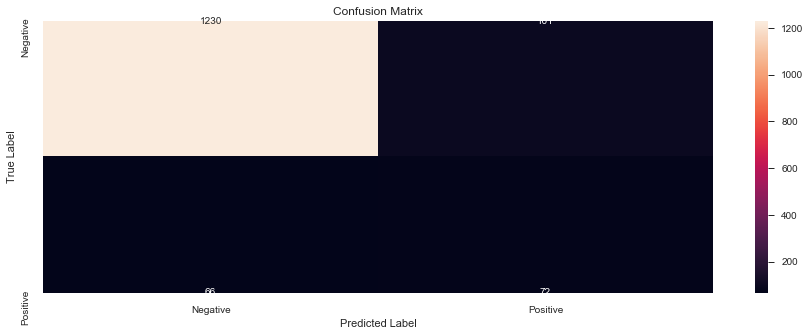

In [102]:
# Confusion Matrix 
cm_nb = confusion_matrix(y_test, y_pred_NB)

class_label = [ "Negative","Positive"]
df_cm1 = pd.DataFrame(cm_nb, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True,fmt='g')  
plt.title("Confusion Matrix")   
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [103]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_NB))
print('Total accuracy:', np.round(metrics.accuracy_score(y_test,y_pred_NB),2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1331
           1       0.42      0.52      0.46       138

    accuracy                           0.89      1469
   macro avg       0.68      0.72      0.70      1469
weighted avg       0.90      0.89      0.89      1469

Total accuracy: 0.89


In [104]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_NB)
print(confusion)
#[row, column]
TP = confusion[1, 1]# we correctly predicted that they will take loan
TN = confusion[0, 0]# we correctly predicted that they will  not take loan
FP = confusion[0, 1]# we incorrectly predicted that they will take loan (a "Type I error") 
FN = confusion[1, 0]# we incorrectly predicted that they will not take loan (a "Type II error")

[[1230  101]
 [  66   72]]


Classification Accuracy: Overall, how often is the classifier correct?

In [105]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_NB))

0.8863172226004085
0.8863172226004085


Classification Error: Overall, how often is the classifier incorrect?
Also known as "Misclassification Rate"

In [106]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_NB))

0.11368277739959155
0.11368277739959154


Sensitivity: When the actual value is positive, how often is the prediction correct?
Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
Also known as "True Positive Rate" or "Recall"
TP /         all positive
all positive = TP + FN

In [107]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_NB))

0.5217391304347826
0.5217391304347826


Specificity: When the actual value is negative, how often is the prediction correct?
Something we want to maximize
How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [108]:
specificity = TN / (TN + FP)

print(specificity)

0.9241172051089407


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [109]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.07588279489105935
0.07588279489105931


Precision: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [110]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_NB))     

0.4161849710982659
0.4161849710982659


### Range estimate at 95% confidence for the model performance in production-NAIVE BAYES

In [111]:
##NAIVE BAYES MODEL have a classification error (calculated above) 0.11368277739959155 (error = 0.11), on a validation dataset with 1469 examples test set (n = 1469). We can calculate the 95% confidence interval (z = 1.96) as follows:
# binomial confidence interval 
from math import sqrt
interval = 1.96 * sqrt( (0.11 * (1 - 0.11)) / 1469)# n=1469(no of observations)
print('%.3f' % interval)

0.016


We can then make claims such as:

The classification error of the model is 11% +/1.6% with 95% confidence level
The true classification error of the model is likely between 9.9% and 12.6%.

In [112]:
y_proba_NB=NB.predict_proba(X_test1)  
fpr3,tpr3,threshold3=roc_curve(y_test,y_proba_NB[:,1])
roc_auc=auc(fpr3,tpr3)
print("Area under the Roc Curve of Naive Bayes is : %f" % roc_auc)

Area under the Roc Curve of Naive Bayes is : 0.923524


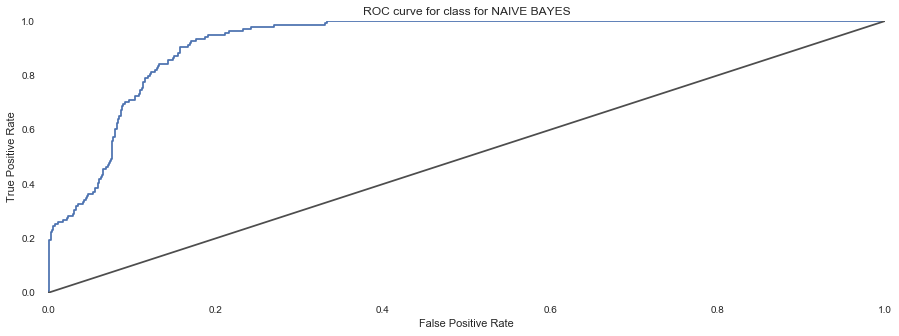

In [113]:
fpr3,tpr3,threshold3=roc_curve(y_test,y_proba_NB[:,1])

fig, ax = plt.subplots()
ax.plot(fpr3, tpr3)  
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for class for NAIVE BAYES', fontweight = 30)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:

i = np.arange(len(tpr3)) # index for df
roc_df = pd.DataFrame({'fpr3' : pd.Series(fpr3, index=i),'tpr3' : pd.Series(tpr3, index = i),  'threshold3' : pd.Series(threshold3, index = i)})

In [115]:
roc_df

fpr3      tpr3    threshold3
0    0.000000  0.000000  2.000000e+00
1    0.000000  0.007246  1.000000e+00
2    0.000751  0.007246  1.000000e+00
3    0.000751  0.050725  9.999996e-01
4    0.001503  0.050725  9.999996e-01
..        ...       ...           ...
158  0.780616  1.000000  3.017215e-05
159  0.782119  1.000000  3.009458e-05
160  0.875282  1.000000  1.262140e-05
161  0.876784  1.000000  1.257049e-05
162  1.000000  1.000000  7.382434e-07

[163 rows x 3 columns]

# NAIVE BAYES OBSERVATION
No Gridsearch CV for NB as it doesn't have any hyperparameters to tune.We got an accuracy score of around 89% with a recall value of 53% which is much less as compared to the Logistic Regression.
Also, the area under the curve is around 92.3%, less than the logistic regression one.
Hence Naive Bayes terms out to be not a good classifier with this particular dataset.


# LOGIT AND OLS MODEL

In [116]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train1)
result=logit_model.fit() 
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.629418
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -1.145   
Dependent Variable: Personal Loan    AIC:              4332.7688
Date:               2020-04-05 12:39 BIC:              4394.1602
No. Observations:   3426             Log-Likelihood:   -2156.4  
Df Model:           9                LL-Null:          -1005.3  
Df Residuals:       3416             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0097     0.0365    0.2666   0.7898   -0.0619    0.0813
x2        0.5640     0.0518   10.8877   0.0000    0.4625    0.6655
x3 

In [117]:
est=sm.OLS(y_train,X_train1)
result=est.fit() 
print(result.summary2()) 

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.332    
Dependent Variable:     Personal Loan    AIC:                         -49.7244 
Date:                   2020-04-05 12:39 BIC:                         11.6671  
No. Observations:       3426             Log-Likelihood:              34.862   
Df Model:               10               F-statistic:                 171.1    
Df Residuals:           3416             Prob (F-statistic):          2.79e-292
R-squared (uncentered): 0.334            Scale:                       0.057538 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1           0.0018        0.0041       0.4483      0.6540      -0.0062       0.0099
x2           0.1221        0.0056      21.96

# Combining all models  ROC Curve in one graph

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(),   
               GaussianNB(), 
               KNeighborsClassifier(3), 
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results 
for cls in classifiers: 
    model = cls.fit(X_train1, y_train)
    yproba = model.predict_proba(X_test1)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,yproba)
    auc = roc_auc_score(y_test,yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                         'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

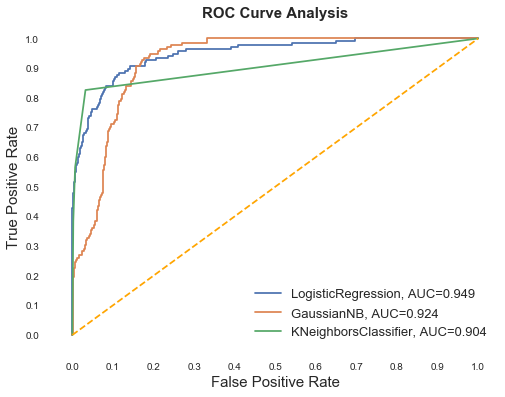

In [119]:
fig = plt.figure(figsize=(8,6))
 
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

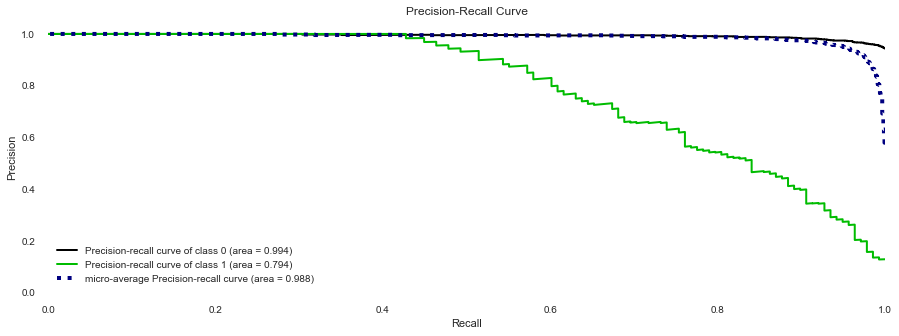

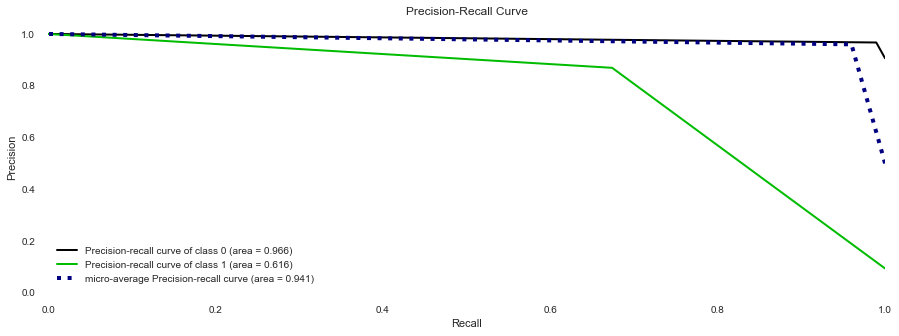

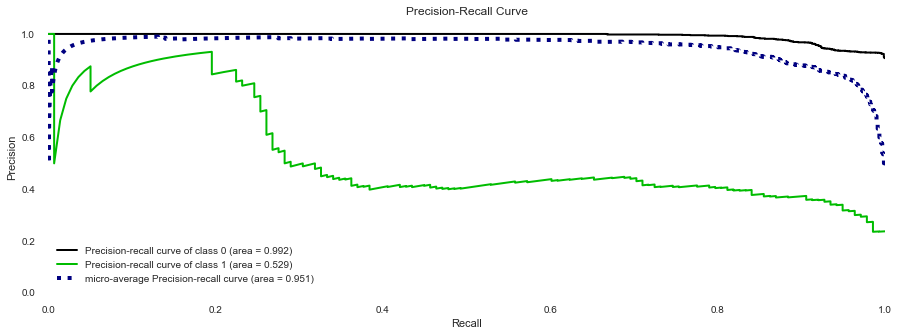

In [120]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, ylog_proba)# For LOGISTIC REGRESSION
plt.show()

skplt.metrics.plot_precision_recall(y_test, knn_prob)# FOR KNN
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_proba_NB)# FOR NAIVE BAYES
plt.show()

# Comparing all the models and selecting the best fit one with K fold cross validation

LR: 0.953619 (0.017048)
KNN: 0.923792 (0.022272)
NB: 0.891088 (0.032302)


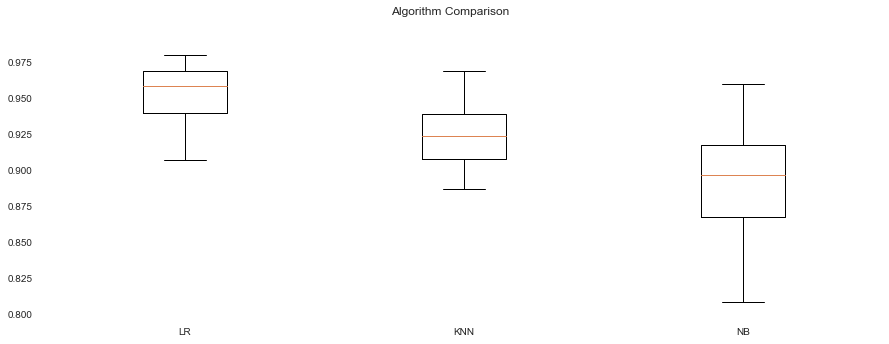

In [121]:
seed = 7
# prepare models
models = []
models.append(('LR', logreg2))
models.append(('KNN', knn1))
models.append(('NB', NB))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=7, random_state=seed)
	cv_results = model_selection.cross_val_score(model,X,y,cv=50, scoring=scoring)
	results.append(cv_results)
	names.append(name)  
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()  
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()     



# PREDICTION WHICH MODEL TO CHOOSE

The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. THREE classification algorithms were used in this study. From the above analysis, it seems like LOGISTIC REGRESSION have the highest MEAN accuracy , HIGHER PRECESION RECALL VALUE AND also have a BEST ROC CURVE amongst all 3 with K fold Cross Validation as compared with KNN AND NAIVE BAYES.

So LOGISTIC REGRESSION IS THE BEST MODEL



# Regularization techniques used for the model.

The word regularize means to make things regular or acceptable. This is exactly why we use it for. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.
One of the major aspects of training your machine learning model is avoiding overfitting. The model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.
The concept of balancing bias and variance, is helpful in understanding the phenomenon of overfitting.

One of the ways of avoiding overfitting is using cross validation, that helps in estimating the error over test set, and in deciding what parameters work best for your model.
This is all the basic you will need, to get started with Regularization. It is a useful technique that can help in improving the accuracy of your regression models.

Grid Search for Parameter Selection:

The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.G

 Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

K Fold Cross Validation:
      
   Normally in a machine learning process, data is divided into training and test sets; the training set is then used to train the model and the test set is used to evaluate the performance of a model. However, this approach may lead to variance problems. In simpler words, a variance problem refers to the scenario where our accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm.

The solution to this problem is to use K-Fold Cross-Validation for performance evaluation where K is any number and this gives us the best evaluation for selection of appropriate model .